In [1]:
from statistics import covariance

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, f1_score, confusion_matrix, accuracy_score, recall_score, \
    ConfusionMatrixDisplay
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

## Baseline Model
Milestone 1 - Group 4 - Turtle Forcast:

Value of Product:
Predict the captureSite from a caught Turtle. Researchers want to understand why specific turtles are captured at specific sites.

Prediction:
There are specific features that are linked to the captureSite.

Evaluation Metric:
f1 score or accuracy

Baseline Model:
The captureSite is the most frequent captureSite.
Score:

..pending..

In [2]:
turtles = pd.read_csv('data/turtles_cleaned.csv')

In [3]:
turtles

,CaptureSite,ForagingGround,Species,CCL_cm,CCW_cm,Weight_Kg,CaptureSiteCategory,CalendarWeek
0,CaptureSite_0,Ocean,Species_6,64.70,62.60,NaN,CaptureSiteCategory_2,50
1,CaptureSite_0,Ocean,Species_6,35.85,31.35,NaN,CaptureSiteCategory_2,42
2,CaptureSite_0,Ocean,Species_5,51.80,49.20,NaN,CaptureSiteCategory_2,43
3,CaptureSite_0,Ocean,Species_6,60.50,59.00,NaN,CaptureSiteCategory_2,10
4,CaptureSite_0,Ocean,Species_5,34.70,33.00,NaN,CaptureSiteCategory_2,31
...,...,...,...,...,...,...,...,...
18057,CaptureSite_9,Ocean,Species_5,57.13,50.57,21.09,CaptureSiteCategory_1,50
18058,CaptureSite_9,Ocean,Species_6,42.07,38.37,9.02,CaptureSiteCategory_1,50
18059,CaptureSite_9,Ocean,Species_5,57.20,52.30,NaN,CaptureSiteCategory_1,51
18060,CaptureSite_9,Ocean,Species_5,51.90,48.50,NaN,CaptureSiteCategory_1,51


# EDA

In [4]:
# ============================================
# FULL EXPLORATORY DATA ANALYSIS (EDA)
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Set style
sns.set(style="ggplot", font_scale=1.2)

# ============================================
# 1. BASIC DATA OVERVIEW
# ============================================

print("\n===== BASIC INFO =====")
print(turtles.info())

print("\n===== FIRST 5 ROWS =====")
display(turtles.head())

print("\n===== SHAPE =====")
print(turtles.shape)

# ============================================
# 2. MISSING VALUE ANALYSIS
# ============================================

print("\n===== MISSING VALUES =====")
missing = turtles.isna().sum().sort_values(ascending=False)
print(missing)

plt.figure(figsize=(8,4))
sns.barplot(x=missing.values, y=missing.index)
plt.title("Missing Values per Feature")
plt.xlabel("Count of Missing")
plt.show()

# ============================================
# 3. SUMMARY STATISTICS
# ============================================

print("\n===== NUMERIC SUMMARY =====")
display(turtles.describe())

print("\n===== CATEGORICAL SUMMARY =====")
cat_cols = turtles.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(turtles[col].value_counts())

# ============================================
# 4. DISTRIBUTIONS OF NUMERIC FEATURES
# ============================================

num_cols = turtles.select_dtypes(include=['float', 'int']).columns

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(turtles[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# ============================================
# 5. BOX PLOTS (OUTLIER VISUALIZATION)
# ============================================

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=turtles[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# ============================================
# 6. CATEGORICAL FEATURE DISTRIBUTIONS
# ============================================

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=turtles[col], order=turtles[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()

# ============================================
# 7. CORRELATION ANALYSIS
# ============================================

plt.figure(figsize=(10,8))
sns.heatmap(turtles[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot
sns.pairplot(turtles[num_cols].dropna(), diag_kind='kde')
plt.show()

# ============================================
# 8. FEATURE RELATIONSHIPS
# ============================================

# Scatterplots
plt.figure(figsize=(6,5))
sns.scatterplot(data=turtles, x="CCL_cm", y="Weight_Kg", hue="Species")
plt.title("Weight vs CCL by Species")
plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(data=turtles, x="CCW_cm", y="Weight_Kg", hue="CaptureSiteCategory")
plt.title("Weight vs CCW by Capture Site Category")
plt.show()

# Boxplots by species
plt.figure(figsize=(8,5))
sns.boxplot(data=turtles, x="Species", y="CCL_cm")
plt.title("CCL by Species")
plt.xticks(rotation=45)
plt.show()

# Seasonal trend
plt.figure(figsize=(8,5))
sns.lineplot(data=turtles, x="CalendarWeek", y="CCL_cm")
plt.title("Seasonal Trend: CCL Over Calendar Week")
plt.show()

# ============================================
# 9. OUTLIER DETECTION (Z-SCORE)
# ============================================

from scipy.stats import zscore

z_scores = turtles[num_cols].apply(zscore)
outliers = (np.abs(z_scores) > 3).sum()

print("\n===== OUTLIERS PER NUMERIC COLUMN (|Z| > 3) =====")
print(outliers)

# ============================================
# 10. SAVE CLEANED SUMMARY REPORT
# ============================================

summary_report = {
    "shape": turtles.shape,
    "missing": missing.to_dict(),
    "numeric_summary": turtles.describe().to_dict()
}

import json
with open("EDA_summary.json", "w") as f:
    json.dump(summary_report, f, indent=4)

print("\nSaved EDA_summary.json")


ValueError: style must be one of white, dark, whitegrid, darkgrid, ticks

In [5]:
X = turtles.drop(columns=['CaptureSite', 'CaptureSiteCategory'])
y = turtles['CaptureSite']
y_alt = turtles['CaptureSiteCategory']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(X, y_alt, test_size=0.30, random_state=42, stratify=y)

In [6]:
def baselineModel(X_train, y_train):
    return (
        np.array([y_train.mode()[0]]* len(X_test))
    )

In [7]:
y_pred = baselineModel(X_test, y_train)
y_alt_pred = baselineModel(X_test_alt, y_train_alt)

In [13]:
# statistics:
f1Score = f1_score(y_test,y_pred,average='weighted')
#xcon = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred, average='weighted')  # why is the micro keyword needed? did we do this differently?

In [14]:
# statistics:
f1Score_alt = f1_score(y_test_alt,y_alt_pred,average='weighted')
#xcon_alt = confusion_matrix(y_test, y_pred)
acc_alt = accuracy_score(y_test_alt, y_alt_pred)
rec_alt = recall_score(y_test_alt, y_alt_pred, average='weighted')  # why is the micro keyword needed? did we do this differently?

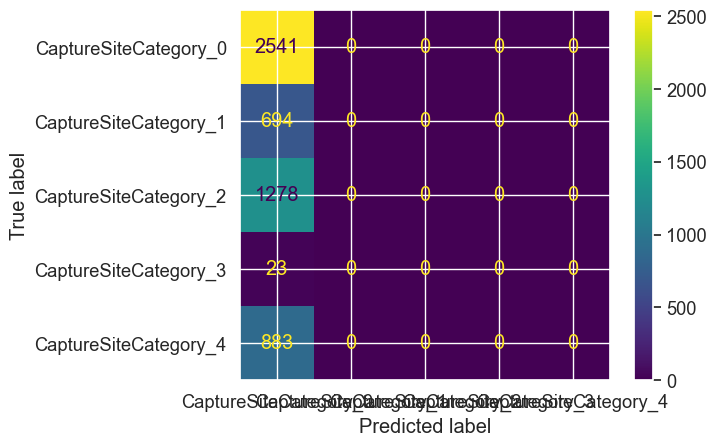

In [10]:
ConfusionMatrixDisplay.from_predictions(y_test_alt,y_alt_pred)